## FlatIron Module 5 - Final Project

## Analyzing Adoption Speed For Dogs

### By Evan Okin

I scoured data science competitions on Kaggle.com to look for a dataset that I was passionate about. I found a competition called "Pet Adoption Speed Prediction" which provides roughly 15,000 rows of data for cats and dogs. As someone who has adopted a dog in the past, I was excited to explore this dataset. In a best case scenario, I might even find enough insights to share with a pet adoption agency to improve the likelihood of pets being adopted.

### Why should we care?

Dogs provide unconditional love. We don't deserve dogs. But, they are available for adoption, in big numbers, and they need our help. I want to uncover what gets a dog adopted, and ultimately if we know why a dog does or does not get adopted, we can provide real value to society.

### Load in the dataset

In [1]:
import pandas as pd
df=pd.read_csv('pet_adoption_data.csv')

### Preview the data

In [2]:
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3


In [3]:
df.shape

(14993, 24)

We can see that there are nearly 15,000 rows of a data, and 24 columns/features to analyze.

The dataset has a feature "Type", where 1 indicates a dog and 2 indicates a cat. We only want to include dogs in our analysis.

In [4]:
dogs=df.loc[df['Type']==1]

In [5]:
dogs.shape

(8131, 24)

### Cleaning data

PetID - Unique hash ID of pet profile
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
Type - Type of animal (1 = Dog, 2 = Cat)
Name - Name of pet (Empty if not named)
Age - Age of pet when listed, in months
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
Quantity - Number of pets represented in profile
Fee - Adoption fee (0 = Free)
State - State location in Malaysia (Refer to StateLabels dictionary)
RescuerID - Unique hash ID of rescuer
VideoAmt - Total uploaded videos for this pet
PhotoAmt - Total uploaded photos for this pet
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

In [6]:
dogs.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,8131.0,8131.000000,8131.000000,8131.000000,8130.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000
mean,1.0,12.907391,262.082893,78.942074,1.738253,2.077727,2.602386,1.328496,1.948469,1.465748,1.668183,1.542492,1.910712,1.037880,1.526872,24.297626,41342.318780,0.058664,3.730660,2.615176
std,0.0,21.378621,80.363697,126.949153,0.639170,1.593609,2.639550,2.632599,0.502075,0.585097,0.720185,0.731312,0.596750,0.203998,1.536312,90.090684,30.155146,0.364308,3.478101,1.144154
min,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,218.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,1.000000,2.000000
50%,1.0,3.000000,307.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,3.000000
75%,1.0,12.000000,307.000000,179.000000,2.000000,2.000000,5.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41332.000000,0.000000,5.000000,4.000000
max,1.0,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [7]:
dogs.columns=[i.lower() for i in dogs.columns]

Null values of a column could be a bad thing - if we find a null value for a column that we care about, we might have to throw out the entire row/datapoint. On the other hand, if the null value is for a variable that is not predictive, it might not matter. In some cases, it will be fine to fill in the data with key statistics such as the mean or mode. Either way, it's important to have a clean dataset.

In [8]:
dogs.isna().sum()

type               0
name             649
age                0
breed1             0
breed2             0
gender             1
color1             0
color2             0
color3             0
maturitysize       0
furlength          0
vaccinated         0
dewormed           0
sterilized         0
health             0
quantity           0
fee                0
state              0
rescuerid          0
videoamt           0
description        3
petid              0
photoamt           0
adoptionspeed      0
dtype: int64

"Name" is heavily missing, but it's also likely not predictive (an owner can easily change the name).

In [9]:
dogs = dogs.drop('name',axis=1)

In [10]:
dogs['gender'].describe()

count    8130.000000
mean        1.738253
std         0.639170
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: gender, dtype: float64

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

In [11]:
dogs['gender'].value_counts()

2.0    4252
1.0    3003
3.0     875
Name: gender, dtype: int64

52% Female, 37% Male, 11% Mixed/Group

Only one missing gender, set equal to the mode (female) so that we don't have to drop the data.

In [12]:
dogs['gender'].fillna(2,inplace=True)

In [13]:
dogs['gender'].value_counts()

2.0    4253
1.0    3003
3.0     875
Name: gender, dtype: int64

"Description" has several missing values, but it's not a feature we will be able to easily analyze.

In [14]:
dogs.drop('description',axis=1,inplace=True)

In [15]:
dogs.isna().sum()

type             0
age              0
breed1           0
breed2           0
gender           0
color1           0
color2           0
color3           0
maturitysize     0
furlength        0
vaccinated       0
dewormed         0
sterilized       0
health           0
quantity         0
fee              0
state            0
rescuerid        0
videoamt         0
petid            0
photoamt         0
adoptionspeed    0
dtype: int64

Good, now there is no missing data left.

In [16]:
dogs.head(3)

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,sterilized,health,quantity,fee,state,rescuerid,videoamt,petid,photoamt,adoptionspeed
2,1.0,1,307,0,1.0,2,7,0,2,2,...,2,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7,3
3,1.0,4,307,0,2.0,1,2,0,2,1,...,2,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8,2
4,1.0,1,307,0,1.0,1,0,0,2,1,...,2,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3,2


Set index to the pet id, unique identifier for the dog.

In [17]:
dogs.set_index('petid',inplace=True)

In [18]:
dogs.head(3)

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,dewormed,sterilized,health,quantity,fee,state,rescuerid,videoamt,photoamt,adoptionspeed
petid,,,,,,,,,,,,,,,,,,,,,
3422e4906,1.0,1,307,0,1.0,2,7,0,2,2,...,1,2,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7,3
5842f1ff5,1.0,4,307,0,2.0,1,2,0,2,1,...,1,2,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,8,2
850a43f90,1.0,1,307,0,1.0,1,0,0,2,1,...,2,2,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,3,2


Delete "type" because now the data includes only dogs.

In [19]:
dogs.drop('type',axis=1,inplace=True)

In [20]:
dogs['age'].describe()

count    8131.000000
mean       12.907391
std        21.378621
min         0.000000
25%         2.000000
50%         3.000000
75%        12.000000
max       255.000000
Name: age, dtype: float64

Range from newborn to 255 months, which is 0 to 21 years.

"Breed1" is the primary breed.

In [21]:
dogs['breed1'].value_counts().head(5)

307    5922
141     205
205     189
179     167
218     161
Name: breed1, dtype: int64

Merge this with other table to interpret breeds.

In [22]:
breeds=pd.read_csv('breed_labels.csv')

In [23]:
breeds.head(3)

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier


In [24]:
dogs.head(3)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,dewormed,sterilized,health,quantity,fee,state,rescuerid,videoamt,photoamt,adoptionspeed
petid,,,,,,,,,,,,,,,,,,,,
3422e4906,1,307,0,1.0,2,7,0,2,2,1,1,2,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7,3
5842f1ff5,4,307,0,2.0,1,2,0,2,1,1,1,2,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,8,2
850a43f90,1,307,0,1.0,1,0,0,2,1,2,2,2,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,3,2


In [25]:
breeds = breeds.rename(columns={'BreedID':'breed1'})
dogs = pd.merge(dogs,breeds,on='breed1')
dogs.head(3)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,...,health,quantity,fee,state,rescuerid,videoamt,photoamt,adoptionspeed,Type,BreedName
0,1,307,0,1.0,2,7,0,2,2,1,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7,3,1,Mixed Breed
1,4,307,0,2.0,1,2,0,2,1,1,...,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,8,2,1,Mixed Breed
2,1,307,0,1.0,1,0,0,2,1,2,...,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,3,2,1,Mixed Breed


Text(0, 0.5, 'Count')

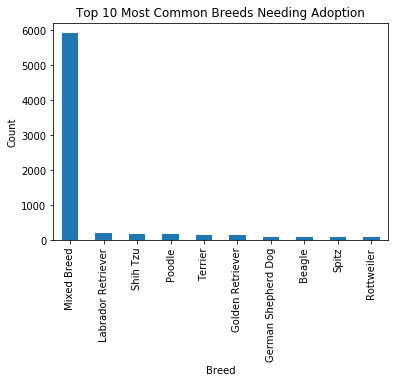

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
dogs['BreedName'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Breeds Needing Adoption')
plt.xlabel('Breed')
plt.ylabel('Count')

In [27]:
colors=pd.read_csv('color_labels.csv')

In [28]:
colors.head(3)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden


In [29]:
colors = colors.rename(columns={'ColorID':'color1'})
dogs = pd.merge(dogs,colors,on='color1')
dogs.head(3)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,...,quantity,fee,state,rescuerid,videoamt,photoamt,adoptionspeed,Type,BreedName,ColorName
0,1,307,0,1.0,2,7,0,2,2,1,...,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7,3,1,Mixed Breed,Brown
1,2,307,0,1.0,2,5,6,2,3,1,...,1,0.0,41326,db784cbcf321e1d8856b312638b94113,0,1,2,1,Mixed Breed,Brown
2,3,307,0,2.0,2,5,7,2,2,3,...,1,0.0,41401,b609c40c6c840db208b149a19b856f86,0,2,2,1,Mixed Breed,Brown


In [30]:
dogs['color1'].value_counts().head(5)

1    3942
2    2656
5     580
7     363
3     342
Name: color1, dtype: int64

Text(0, 0.5, 'Count')

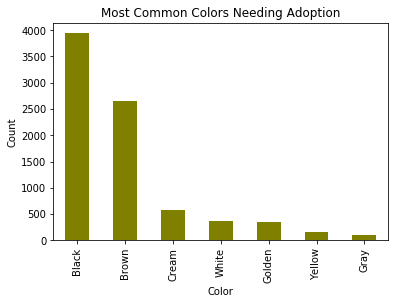

In [31]:
dogs['ColorName'].value_counts().head(10).plot(kind='bar',color='olive')
plt.title('Most Common Colors Needing Adoption')
plt.xlabel('Color')
plt.ylabel('Count')

MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

In [32]:
dogs['maturitysize'].value_counts()

2    6123
1    1222
3     760
4      22
Name: maturitysize, dtype: int64

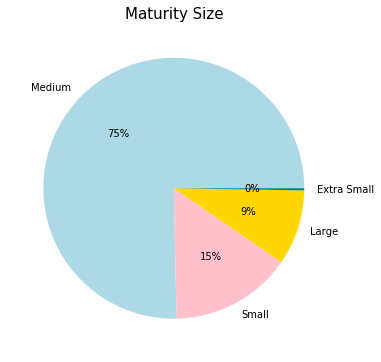

['Medium', 'Small', 'Large', 'Extra Small']

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
labels=['Medium','Small','Large','Extra Small']
sizes=dogs['maturitysize'].value_counts().values
colors=['lightblue','pink','gold','teal']
explode=[0,0,0,0]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct= '%1.0f%%')
plt.title('Maturity Size',fontsize=15)
plt.show()
labels

FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

In [34]:
dogs['furlength'].value_counts()

1    4721
2    3026
3     380
Name: furlength, dtype: int64

Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

In [35]:
dogs['vaccinated'].value_counts()

1    3903
2    3017
3    1207
Name: vaccinated, dtype: int64

Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)/

In [36]:
dogs['dewormed'].value_counts()

1    4883
2    2079
3    1165
Name: dewormed, dtype: int64

Too much "missing"? 

In [37]:
dogs.loc[(dogs['vaccinated']==3)&(dogs['dewormed']==3)].shape

(1040, 23)

We are including this in our dataset, but it's important to note that there are 1040 data points where the adoption agency is unsure of both vaccination and deworming.

Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

In [38]:
dogs['sterilized'].value_counts()

2    5167
1    1843
3    1117
Name: sterilized, dtype: int64

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

In [39]:
dogs['health'].value_counts()

1    7840
2     266
3      21
Name: health, dtype: int64

Quantity - Number of pets represented in profile

In [40]:
dogs['quantity'].value_counts(normalize=True)

1     0.814200
2     0.075181
3     0.031623
4     0.025840
5     0.018211
6     0.014396
7     0.007014
8     0.005537
9     0.003691
10    0.000984
20    0.000984
11    0.000861
12    0.000492
17    0.000369
16    0.000246
15    0.000123
14    0.000123
13    0.000123
Name: quantity, dtype: float64

Fee - Adoption fee (0 = Free)

Text(0, 0.5, 'Count')

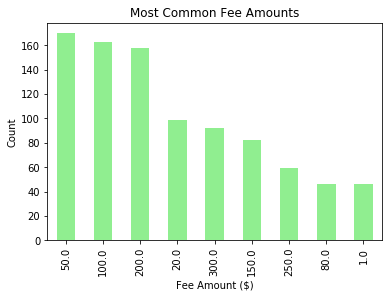

In [41]:
dogs['fee'].value_counts().head(10).drop(0).plot(kind='bar',color='lightgreen')
plt.title('Most Common Fee Amounts')
plt.xlabel('Fee Amount ($)')
plt.ylabel('Count')

State - State location in Malaysia (Refer to StateLabels dictionary)

In [42]:
state=pd.read_csv('state_labels.csv')

In [43]:
state.head(3)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan


In [44]:
state = state.rename(columns={'StateID':'state'})
dogs = pd.merge(dogs,state,on='state')
dogs.head(3)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,...,fee,state,rescuerid,videoamt,photoamt,adoptionspeed,Type,BreedName,ColorName,StateName
0,1,307,0,1.0,2,7,0,2,2,1,...,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7,3,1,Mixed Breed,Brown,Selangor
1,2,307,0,1.0,2,5,6,2,3,1,...,0.0,41326,db784cbcf321e1d8856b312638b94113,0,1,2,1,Mixed Breed,Brown,Selangor
2,12,307,0,2.0,2,7,0,2,2,2,...,0.0,41326,a042471e0f43f2cf707104a1a138a7df,0,7,2,1,Mixed Breed,Brown,Selangor


Text(0, 0.5, 'Count')

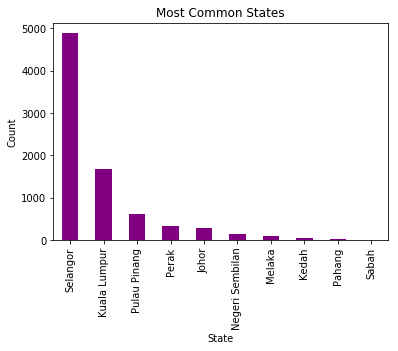

In [45]:
dogs['StateName'].value_counts().head(10).plot(kind='bar',color='purple')
plt.title('Most Common States')
plt.xlabel('State')
plt.ylabel('Count')

RescuerID - Unique hash ID of rescuer

In [46]:
dogs['rescuerid'].head(5)

0    fa90fa5b1ee11c86938398b60abc32cb
1    db784cbcf321e1d8856b312638b94113
2    a042471e0f43f2cf707104a1a138a7df
3    c9a898071102b4fc7d485be4ff0e35d9
4    8b6c5cd067ada5f54ca5ffc7f7b5d896
Name: rescuerid, dtype: object

In [47]:
dogs.drop('rescuerid',axis=1,inplace=True)

VideoAmt - Total uploaded videos for this pet

In [48]:
dogs['videoamt'].value_counts(normalize=False)

0    7818
1     220
2      45
3      26
4      10
5       4
8       2
7       1
6       1
Name: videoamt, dtype: int64

PhotoAmt - Total uploaded photos for this pet

In [49]:
dogs['photoamt'].value_counts(normalize=False).head(5)

1    1880
2    1471
3    1296
5    1039
4     948
Name: photoamt, dtype: int64

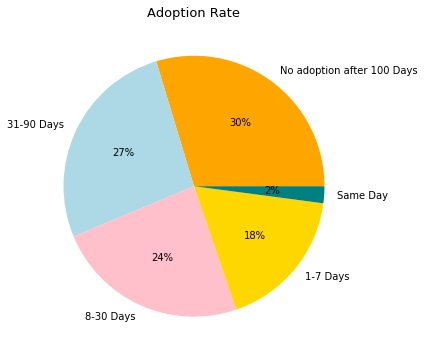

['No adoption after 100 Days',
 '31-90 Days',
 '8-30 Days',
 '1-7 Days',
 'Same Day']

In [50]:
labels=['No adoption after 100 Days','31-90 Days','8-30 Days','1-7 Days','Same Day']
sizes=dogs['adoptionspeed'].value_counts().values
colors=['orange','lightblue','pink','gold','teal']
explode=[0,0,0,0,0]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct= '%1.0f%%')
plt.title('Adoption Rate',fontsize=13)
plt.show()
labels

How many data points will we run through our prediction algorithms?

In [51]:
dogs.shape[0]

8127

How many features will we run through our prediction algorithms?

In [52]:
dogs.columns

Index(['age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3',
       'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized',
       'health', 'quantity', 'fee', 'state', 'videoamt', 'photoamt',
       'adoptionspeed', 'Type', 'BreedName', 'ColorName', 'StateName'],
      dtype='object')

In [53]:
features=['age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3',
       'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized',
       'health', 'quantity', 'fee', 'state', 'videoamt', 'photoamt']

In [54]:
len(features)

18

In [55]:
target = ['adoptionspeed']

### Will a dog get adopted? (Yes/No)

We can predict if a dog will be adopted using machine learning algorithms.

### Logistic Regression

Logistic regression is a binary yes/no prediction. We need a yes/no column for whether or not a dog is adopted.

In [56]:
dogs.head(10)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,...,quantity,fee,state,videoamt,photoamt,adoptionspeed,Type,BreedName,ColorName,StateName
0,1,307,0,1.0,2,7,0,2,2,1,...,1,0.0,41326,0,7,3,1,Mixed Breed,Brown,Selangor
1,2,307,0,1.0,2,5,6,2,3,1,...,1,0.0,41326,0,1,2,1,Mixed Breed,Brown,Selangor
2,12,307,0,2.0,2,7,0,2,2,2,...,1,0.0,41326,0,7,2,1,Mixed Breed,Brown,Selangor
3,72,307,0,2.0,2,7,0,2,1,1,...,1,0.0,41326,0,3,4,1,Mixed Breed,Brown,Selangor
4,2,307,0,1.0,2,7,0,2,1,1,...,1,0.0,41326,0,3,3,1,Mixed Breed,Brown,Selangor
5,12,307,307,2.0,2,0,0,2,2,1,...,2,0.0,41326,0,5,4,1,Mixed Breed,Brown,Selangor
6,3,307,0,2.0,2,7,0,1,1,3,...,1,0.0,41326,0,0,3,1,Mixed Breed,Brown,Selangor
7,60,307,0,2.0,2,5,0,2,1,2,...,1,0.0,41326,0,2,4,1,Mixed Breed,Brown,Selangor
8,12,307,0,2.0,2,0,0,2,1,1,...,1,0.0,41326,0,3,3,1,Mixed Breed,Brown,Selangor
9,2,307,307,1.0,2,0,0,2,2,1,...,1,0.0,41326,0,5,1,1,Mixed Breed,Brown,Selangor


In [57]:
import numpy as np
dogs['adoptedindicator']=np.where(dogs['adoptionspeed']==4,0,1)

In [58]:
dogs.head(10)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,...,fee,state,videoamt,photoamt,adoptionspeed,Type,BreedName,ColorName,StateName,adoptedindicator
0,1,307,0,1.0,2,7,0,2,2,1,...,0.0,41326,0,7,3,1,Mixed Breed,Brown,Selangor,1
1,2,307,0,1.0,2,5,6,2,3,1,...,0.0,41326,0,1,2,1,Mixed Breed,Brown,Selangor,1
2,12,307,0,2.0,2,7,0,2,2,2,...,0.0,41326,0,7,2,1,Mixed Breed,Brown,Selangor,1
3,72,307,0,2.0,2,7,0,2,1,1,...,0.0,41326,0,3,4,1,Mixed Breed,Brown,Selangor,0
4,2,307,0,1.0,2,7,0,2,1,1,...,0.0,41326,0,3,3,1,Mixed Breed,Brown,Selangor,1
5,12,307,307,2.0,2,0,0,2,2,1,...,0.0,41326,0,5,4,1,Mixed Breed,Brown,Selangor,0
6,3,307,0,2.0,2,7,0,1,1,3,...,0.0,41326,0,0,3,1,Mixed Breed,Brown,Selangor,1
7,60,307,0,2.0,2,5,0,2,1,2,...,0.0,41326,0,2,4,1,Mixed Breed,Brown,Selangor,0
8,12,307,0,2.0,2,0,0,2,1,1,...,0.0,41326,0,3,3,1,Mixed Breed,Brown,Selangor,1
9,2,307,307,1.0,2,0,0,2,2,1,...,0.0,41326,0,5,1,1,Mixed Breed,Brown,Selangor,1


In [59]:
dogs['adoptedindicator'].value_counts()

1    5715
0    2412
Name: adoptedindicator, dtype: int64

In [60]:
dogs['adoptedindicator'].value_counts(normalize=True)

1    0.703212
0    0.296788
Name: adoptedindicator, dtype: float64

Save this dataset so we can refer to it later.

In [61]:
dogs.to_csv('dogs.csv')

In [62]:
dogs.head(2)

,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,vaccinated,...,fee,state,videoamt,photoamt,adoptionspeed,Type,BreedName,ColorName,StateName,adoptedindicator
0,1,307,0,1.0,2,7,0,2,2,1,...,0.0,41326,0,7,3,1,Mixed Breed,Brown,Selangor,1
1,2,307,0,1.0,2,5,6,2,3,1,...,0.0,41326,0,1,2,1,Mixed Breed,Brown,Selangor,1


Text(0, 0.5, 'Adoption Frequency')

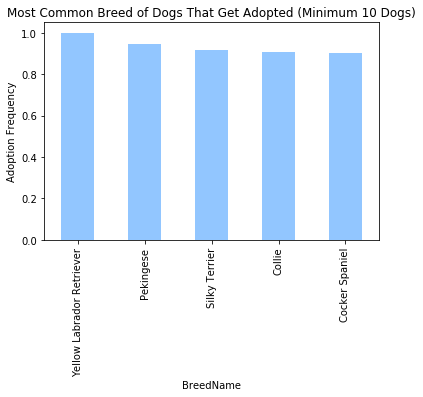

In [63]:
adjustedlist=list(dogs['breed1'].value_counts().head(36).index)
dogsadjusted=dogs.loc[dogs['breed1'].isin(adjustedlist),:]
dogsadjusted.groupby('BreedName')['adoptedindicator'].mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Most Common Breed of Dogs That Get Adopted (Minimum 10 Dogs)')
plt.ylabel('Adoption Frequency')

In [64]:
features=['age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3',
       'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized',
       'health', 'quantity', 'fee', 'state', 'videoamt', 'photoamt']

breed_dummies=pd.get_dummies(dogs['breed1'],prefix='breed') 
dogs=pd.concat([dogs,breed_dummies],axis=1) 
dogs.drop(['breed1'],axis=1,inplace=True)
dogs.drop(['breed2'],axis=1,inplace=True)
#dogs.drop(['breed_307'],axis=1,inplace=True)


gender_dummies=pd.get_dummies(dogs['gender'],prefix='gender')
dogs=pd.concat([dogs,gender_dummies],axis=1)
dogs.drop(['gender'],axis=1,inplace=True)
dogs.drop(['gender_3.0'],axis=1,inplace=True)

color_dummies=pd.get_dummies(dogs['color1'],prefix='color')
dogs=pd.concat([dogs,color_dummies],axis=1)
dogs.drop(['color1'],axis=1,inplace=True)
dogs.drop(['color2'],axis=1,inplace=True)
dogs.drop(['color3'],axis=1,inplace=True)

maturitysize_dummies=pd.get_dummies(dogs['maturitysize'],prefix='maturitysize')
dogs=pd.concat([dogs,maturitysize_dummies],axis=1)
dogs.drop(['maturitysize'],axis=1,inplace=True)

furlength_dummies=pd.get_dummies(dogs['furlength'],prefix='furlength')
dogs=pd.concat([dogs,furlength_dummies],axis=1)
dogs.drop(['furlength'],axis=1,inplace=True)

vaccinated_dummies=pd.get_dummies(dogs['vaccinated'],prefix='vaccinated')
dogs=pd.concat([dogs,vaccinated_dummies],axis=1)
dogs.drop(['vaccinated'],axis=1,inplace=True)

dewormed_dummies=pd.get_dummies(dogs['dewormed'],prefix='dewormed')
dogs=pd.concat([dogs,dewormed_dummies],axis=1)
dogs.drop(['dewormed'],axis=1,inplace=True)

sterilized_dummies=pd.get_dummies(dogs['sterilized'],prefix='sterilized')
dogs=pd.concat([dogs,sterilized_dummies],axis=1)
dogs.drop(['sterilized'],axis=1,inplace=True)

health_dummies=pd.get_dummies(dogs['health'],prefix='health')
dogs=pd.concat([dogs,health_dummies],axis=1)
dogs.drop(['health'],axis=1,inplace=True)

state_dummies=pd.get_dummies(dogs['state'],prefix='state')
dogs=pd.concat([dogs,state_dummies],axis=1)
dogs.drop(['state'],axis=1,inplace=True)

dogs.drop(['Type'],axis=1,inplace=True)

dogs = dogs.loc[dogs['quantity']==1]

dogs.head()

,age,quantity,fee,videoamt,photoamt,adoptionspeed,BreedName,ColorName,StateName,adoptedindicator,...,state_41330,state_41332,state_41335,state_41336,state_41342,state_41345,state_41361,state_41367,state_41401,state_41415
0,1,1,0.0,0,7,3,Mixed Breed,Brown,Selangor,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0.0,0,1,2,Mixed Breed,Brown,Selangor,1,...,0,0,0,0,0,0,0,0,0,0
2,12,1,0.0,0,7,2,Mixed Breed,Brown,Selangor,1,...,0,0,0,0,0,0,0,0,0,0
3,72,1,0.0,0,3,4,Mixed Breed,Brown,Selangor,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0.0,0,3,3,Mixed Breed,Brown,Selangor,1,...,0,0,0,0,0,0,0,0,0,0


Split data into training set and testing set for logistic regression.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X=dogs[dogs.columns.drop(['BreedName','ColorName','StateName','adoptionspeed','adoptedindicator'])]
y=dogs['adoptedindicator']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=88)

Train and fit a logistic regression on the training set.

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(X_train,y_train)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Predict values for testing set.

In [70]:
predictions = logmodel.predict(X_test)

Create a classification report for the model.

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.31      0.42       559
           1       0.78      0.94      0.85      1427

   micro avg       0.76      0.76      0.76      1986
   macro avg       0.72      0.62      0.64      1986
weighted avg       0.74      0.76      0.73      1986



In [73]:
print(confusion_matrix(y_test,predictions))

[[ 174  385]
 [  90 1337]]


In [74]:
a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
log_accuracy=a/(a+b)
log_accuracy

0.7608257804632427

Logistic Regression: 76% Accuracy

### K-Nearest Neighbors

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()

In [77]:
scaler.fit(X)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
scaled_features = scaler.transform(X)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [79]:
#Convert scaled features to df
dogs_feat = pd.DataFrame(scaled_features)

In [80]:
dogs_feat.head(3)

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,-0.596407,0.0,-0.29953,-0.165929,1.171620,0.0,0.0,-0.017388,-0.012294,-0.021297,...,-0.201019,-0.121333,-0.060334,-0.182816,-0.012294,-0.024594,-0.021297,-0.021297,-0.509805,-0.012294
1,-0.551997,0.0,-0.29953,-0.165929,-0.796964,0.0,0.0,-0.017388,-0.012294,-0.021297,...,-0.201019,-0.121333,-0.060334,-0.182816,-0.012294,-0.024594,-0.021297,-0.021297,-0.509805,-0.012294
2,-0.107895,0.0,-0.29953,-0.165929,1.171620,0.0,0.0,-0.017388,-0.012294,-0.021297,...,-0.201019,-0.121333,-0.060334,-0.182816,-0.012294,-0.024594,-0.021297,-0.021297,-0.509805,-0.012294


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X=scaled_features
y=dogs['adoptedindicator']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=88)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier(n_neighbors=1) #put back to 1!

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [86]:
pred=knn.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       559
           1       0.79      0.81      0.80      1427

   micro avg       0.71      0.71      0.71      1986
   macro avg       0.64      0.63      0.63      1986
weighted avg       0.70      0.71      0.71      1986

[[ 255  304]
 [ 277 1150]]


In [89]:
a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
knn_accuracy=a/(a+b)
knn_accuracy

0.7608257804632427

KNN: 76% Accuracy

### Decision Trees

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X=dogs[dogs.columns.drop(['BreedName','ColorName','StateName','adoptionspeed','adoptedindicator'])]
y=dogs['adoptedindicator']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=88)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtree = DecisionTreeClassifier()

In [94]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
predictions=dtree.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       559
           1       0.79      0.81      0.80      1427

   micro avg       0.71      0.71      0.71      1986
   macro avg       0.64      0.63      0.63      1986
weighted avg       0.70      0.71      0.71      1986

[[ 255  304]
 [ 277 1150]]


In [98]:
a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
dt_accuracy=a/(a+b)
dt_accuracy

0.7069486404833837

### Ensemble Methods: Random Forests

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
for i in range(1,20,2):
    rfc=RandomForestClassifier(n_estimators=1000,max_depth=i,random_state=88)
    rfc.fit(X_train,y_train)
    predictions=rfc.predict(X_test)
    print(confusion_matrix(y_test,pred))
    a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
    b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
    rf_accuracy_max_depth_i=a/(a+b)
    print('Max depth ' + str(i) + ': ' + str(rf_accuracy_max_depth_i))

[[ 255  304]
 [ 277 1150]]
Max depth 1: 0.7185297079556898
[[ 255  304]
 [ 277 1150]]
Max depth 3: 0.7185297079556898
[[ 255  304]
 [ 277 1150]]
Max depth 5: 0.7185297079556898
[[ 255  304]
 [ 277 1150]]
Max depth 7: 0.7230614300100705
[[ 255  304]
 [ 277 1150]]
Max depth 9: 0.7371601208459214
[[ 255  304]
 [ 277 1150]]
Max depth 11: 0.7522658610271903
[[ 255  304]
 [ 277 1150]]
Max depth 13: 0.756797583081571
[[ 255  304]
 [ 277 1150]]
Max depth 15: 0.7668680765357503
[[ 255  304]
 [ 277 1150]]
Max depth 17: 0.7658610271903323
[[ 255  304]
 [ 277 1150]]
Max depth 19: 0.7658610271903323


We tuned the random forest to have maximum accuracy when max depth is 15.

In [101]:
rfc=RandomForestClassifier(n_estimators=1000,max_depth=15,random_state=88)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
rf_accuracy=a/(a+b)
rf_accuracy
TN=confusion_matrix(y_test,predictions)[0,0]
TP=confusion_matrix(y_test,predictions)[1,1]
FP=confusion_matrix(y_test,predictions)[0,1]
FN=confusion_matrix(y_test,predictions)[1,0]

### Support Vector Machines

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X=dogs[dogs.columns.drop(['BreedName','ColorName','StateName','adoptionspeed','adoptedindicator'])]
y=dogs['adoptedindicator']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=88)

In [104]:
from sklearn.svm import SVC

In [105]:
svc_model = SVC()

In [106]:
svc_model.fit(X_train,y_train)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [107]:
predictions=svc_model.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       559
           1       0.79      0.81      0.80      1427

   micro avg       0.71      0.71      0.71      1986
   macro avg       0.64      0.63      0.63      1986
weighted avg       0.70      0.71      0.71      1986

[[ 255  304]
 [ 277 1150]]


In [110]:
a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
svc_accuracy=a/(a+b)
svc_accuracy

0.7230614300100705

### Principal Component Analysis

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()

In [113]:
scaler.fit(X)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [114]:
scaled_data=scaler.transform(X)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=4)

In [117]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [118]:
x_pca=pca.transform(scaled_data)

In [119]:
scaled_data.shape

(6617, 162)

In [120]:
x_pca.shape

(6617, 4)

In [121]:
#pca.components_

In [122]:
dogs_comp = pd.DataFrame(pca.components_,columns=X.columns)

Run a logistic regression on PCA.

In [123]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=88)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
logmodel=LogisticRegression()

In [126]:
logmodel.fit(X_train,y_train)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
predictions=logmodel.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.33      0.00      0.01       559
           1       0.72      1.00      0.84      1427

   micro avg       0.72      0.72      0.72      1986
   macro avg       0.53      0.50      0.42      1986
weighted avg       0.61      0.72      0.60      1986



In [130]:
print(confusion_matrix(y_test,predictions))

[[   2  557]
 [   4 1423]]


In [131]:
a=confusion_matrix(y_test,predictions)[0,0]+confusion_matrix(y_test,predictions)[1,1]
b=confusion_matrix(y_test,predictions)[0,1]+confusion_matrix(y_test,predictions)[1,0]
pca_accuracy=a/(a+b)
pca_accuracy

0.7175226586102719

### Comparing ML Model Results

In [132]:
print('logistic regression ' + str(log_accuracy))
print('knn ' + str(knn_accuracy))
print('decision trees ' + str(dt_accuracy))
print('random forest ' + str(rf_accuracy))
print('support vector machine ' + str(svc_accuracy))
print('principal component analysis ' + str(pca_accuracy))

logistic regression 0.7608257804632427
knn 0.7608257804632427
decision trees 0.7069486404833837
random forest 0.7668680765357503
support vector machine 0.7230614300100705
principal component analysis 0.7175226586102719


In [133]:
df = pd.DataFrame({"Machine Learning Algorithm": ['Random Forest','Logistic Regression','K-Nearest Neighbors','Support Vector Machine','PCA (4 Features)','Decision Trees','Monkey Guessing'],
"Accuracy": [rf_accuracy,log_accuracy,knn_accuracy,svc_accuracy,pca_accuracy,dt_accuracy,.5]})

In [134]:
df

,Machine Learning Algorithm,Accuracy
0,Random Forest,0.766868
1,Logistic Regression,0.760826
2,K-Nearest Neighbors,0.760826
3,Support Vector Machine,0.723061
4,PCA (5 Features),0.717523
5,Decision Trees,0.706949
6,Monkey Guessing,0.500000


In [135]:
df.set_index('Machine Learning Algorithm',inplace=True)
df['Accuracy']=round(df['Accuracy'],2)
df

,Accuracy
Machine Learning Algorithm,
Random Forest,0.77
Logistic Regression,0.76
K-Nearest Neighbors,0.76
Support Vector Machine,0.72
PCA (5 Features),0.72
Decision Trees,0.71
Monkey Guessing,0.50


Text(0.5, 1.0, 'Comparison of Accuracy Under Different ML Algorithms')

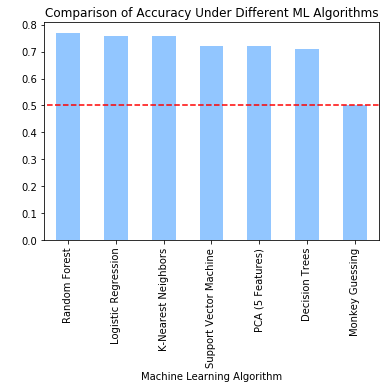

In [136]:
df.plot(kind='bar',legend=False)
plt.hlines(y=0.5,xmin=-100,xmax=100,linestyle='dashed',color='red')
plt.ylabel('Accuracy (%)',color='white')
plt.xlabel('Machine Learning Algorithm')
plt.title('Comparison of Accuracy Under Different ML Algorithms')

Top three most accurate models are random forest, logistic regression, and K-nearest neighbors.

Let's again observe the random forest model (most accurate).

In [137]:
print('Actual Not Adopted, Predicted Not Adopted (True Negative): ' + str(confusion_matrix(y_test,pred)[0,0]))
print('Actual Yes Adopted , Predicted Yes Adopted (True Positive): ' + str(confusion_matrix(y_test,pred)[1,1]))

Actual Not Adopted, Predicted Not Adopted (True Negative): 255
Actual Yes Adopted , Predicted Yes Adopted (True Positive): 1150


In [138]:
print('Actual Not Adopted, Predicted Yes Adopted (False Positive): ' + str(confusion_matrix(y_test,pred)[0,1]))
print('Actual Yes Adopted, Predicted Not Adopted (False Negative): ' + str(confusion_matrix(y_test,pred)[1,0]))

Actual Not Adopted, Predicted Yes Adopted (False Positive): 304
Actual Yes Adopted, Predicted Not Adopted (False Negative): 277


In [139]:
TOT=TN+TP+FP+FN

In [140]:
print('Accurate: ' + str((TN+TP)/(TOT)))
print('---------------------------------')
print('True Positive: ' + str((TP)/(TOT)))
print('True Negative: ' + str((TN)/(TOT)))
print('False Positive: ' + str((FP)/(TOT)))
print('False Negative: ' + str((FN)/(TOT)))

Accurate: 0.7668680765357503
---------------------------------
True Positive: 0.6822759315206445
True Negative: 0.08459214501510574
False Positive: 0.19687814702920442
False Negative: 0.03625377643504532


The rough breakdown for our prediction model is 77% accurate prediction, 19% false positive (predicted adopted but not actually adopted), 4% false negative (predicted not adopted but actually adopted)

### Recommendations

Best model: random forest with n_estimators=1,000, max_depth=15; 77% accuracy.

The following are things we can do to increase the likelihood that dogs will get adopted:

- Post more photos.

- Make sure the dog gets vaccinated.

- Make sure the dog is sterilized.

Out of our control, but important for prediction:

- Breed makes a big difference; for example, Yellow Labs, Pekingese, Silky Terriers, Collies and Cocker Spaniels have the highest adoption rates.

- Younger dogs are more likely to be adopted.

### Next Steps

- Provide a more extensive list of features that influence adoption (such as specific breeds or locations)

- Continue fine-tuning model parameters.

- Analyze dataset for cats to see if it is more predictive than dogs.

- Consider "bucketing" adoption speeds to see if it helps prediction.

- Dig deeper into Principal Component Analysis (check different numbers of features).